# Predicting the placement of a college student cgpa and iq

### importing necessary packages and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('placement-dataset.csv')

In [3]:
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
data.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [7]:
data.dtypes

cgpa         float64
iq           float64
placement      int64
dtype: object

## visualizing of data to find insights from it 

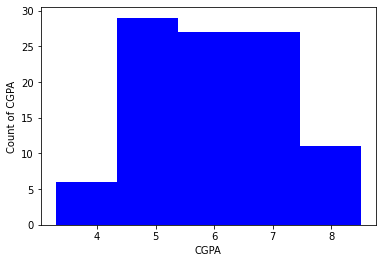

In [8]:
plt.hist(data['cgpa'],bins = 5,color='blue')
plt.xlabel('CGPA')
plt.ylabel('Count of CGPA')
plt.show()


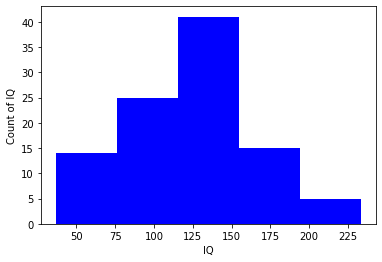

In [9]:
plt.hist(data['iq'],bins = 5,color='blue')
plt.xlabel('IQ')
plt.ylabel('Count of IQ')
plt.show()


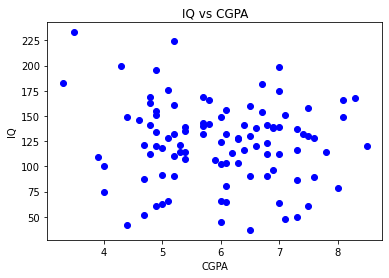

In [10]:
plt.scatter(data['cgpa'],data['iq'],color='blue')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('IQ vs CGPA')
plt.show()

## checking for outliers by using Box plot 

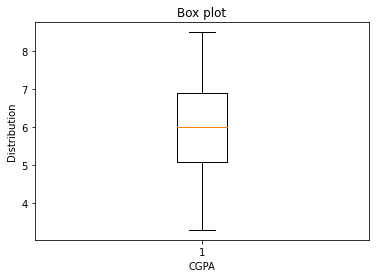

In [11]:
#Checking for outliers
plt.boxplot(data['cgpa'])
plt.xlabel('CGPA')
plt.ylabel('Distribution')
plt.title('Box plot')
plt.show()

## The Data does not contain any outliers

# Missing values checking

In [12]:
data.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

## no missing values

In [13]:
#checking unique values
uniq = data['cgpa'].unique()
print(uniq)

[6.8 5.9 5.3 7.4 5.8 7.1 5.7 5.  6.1 5.1 6.  6.9 5.4 6.4 5.2 3.3 4.  6.6
 4.9 4.7 7.  7.6 3.9 4.8 8.1 6.5 4.6 7.5 3.5 8.3 7.8 8.  7.3 6.3 8.5 6.7
 4.4 4.3 6.2]


In [14]:
uniq1 = data['iq'].unique()
print(uniq1)

[123. 106. 121. 132. 142.  48. 143.  63. 156.  66.  45. 138. 139. 116.
 103. 176. 224. 183. 100. 120. 151.  87.  91. 199. 124.  90. 112. 128.
 109. 149. 163. 140. 160. 146. 134. 114.  89. 141.  61. 161. 135. 233.
 175. 168.  65. 130.  79. 137. 102.  64. 166.  96. 118.  75. 127. 154.
 169. 155.  50.  81. 196. 107.  37.  86. 158. 110.  52. 200.  42. 182.
 113.]


## separating target and features and splitting into train and test  

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
x = data[['cgpa','iq']]
y = data['placement']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## data modelling using logistic regression

In [18]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(prediction)

[1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1]


In [19]:
acc = accuracy_score(y_test,prediction)
print("Accuracy:",acc)

Accuracy: 0.9


## iterating the data for 15 times with logistic regression 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = LogisticRegression()

accuracy_scores = []

for i in range(15):
    train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=i)
    
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)

    accuracy = accuracy_score(test_y, predictions)
    accuracy_scores.append(accuracy)

for i, score in enumerate(accuracy_scores):
    print(f'Iteration {i + 1} - Accuracy: {score:.2%}')


Iteration 1 - Accuracy: 83.33%
Iteration 2 - Accuracy: 86.67%
Iteration 3 - Accuracy: 90.00%
Iteration 4 - Accuracy: 93.33%
Iteration 5 - Accuracy: 93.33%
Iteration 6 - Accuracy: 90.00%
Iteration 7 - Accuracy: 96.67%
Iteration 8 - Accuracy: 93.33%
Iteration 9 - Accuracy: 93.33%
Iteration 10 - Accuracy: 93.33%
Iteration 11 - Accuracy: 96.67%
Iteration 12 - Accuracy: 93.33%
Iteration 13 - Accuracy: 93.33%
Iteration 14 - Accuracy: 86.67%
Iteration 15 - Accuracy: 96.67%


# Predicting the placement of student randomly with cgpa and iq using Logistic Regression

In [21]:
import numpy as np
features = np.array([[8.9,170]])
print(model.predict(features))

[1]


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
features = np.array([[4.7,120]])
print(model.predict(features))

[0]


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## data modelling using Random Forest Algorithm 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
acc = accuracy_score(y_test,prediction)
print("Accuracy:",acc)

Accuracy: 0.9333333333333333


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100)  

accuracy_scores = []

for i in range(15):
   
    train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=i)
    
    model.fit(train_X, train_y)
   
    predictions = model.predict(test_X)
    
    accuracy = accuracy_score(test_y, predictions)
    accuracy_scores.append(accuracy)


for i, score in enumerate(accuracy_scores):
    print(f'Iteration {i + 1} - Accuracy: {score:.2%}')


Iteration 1 - Accuracy: 86.67%
Iteration 2 - Accuracy: 93.33%
Iteration 3 - Accuracy: 96.67%
Iteration 4 - Accuracy: 96.67%
Iteration 5 - Accuracy: 93.33%
Iteration 6 - Accuracy: 90.00%
Iteration 7 - Accuracy: 96.67%
Iteration 8 - Accuracy: 93.33%
Iteration 9 - Accuracy: 96.67%
Iteration 10 - Accuracy: 100.00%
Iteration 11 - Accuracy: 100.00%
Iteration 12 - Accuracy: 100.00%
Iteration 13 - Accuracy: 100.00%
Iteration 14 - Accuracy: 90.00%
Iteration 15 - Accuracy: 96.67%


# Predicting the placement of student randomly with cgpa and iq using Random Forest

In [25]:
import numpy as np
features = np.array([[7.0,160]])
print(model.predict(features))

[1]


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
features = np.array([[5.0,120]])
print(model.predict(features))

[0]


C:\Users\mohammed rafik m\Downloads\New folder\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Summary

## Thus, the prediction of placement of a students with cgpa and iq has been successful with machine learning algorithms of Logistic Regression and Random Forest algoritm 

# where,
## 1 - placed
## 0 - not placed